In [54]:
import jax.numpy as jnp
import jax 
import matplotlib.pyplot as plt

In [55]:
n = 100 
tf = 10.0 
h = tf / n
theta = jnp.zeros(n)
a = jnp.pi/4 #angulo inicial
theta = theta.at[0].set(a)
theta = theta.at[1].set(theta[0] + (h**2)*(-jnp.sin(theta[0]))/2) #calculo da segunda posicao, como acessamos a posicao anterior precisamos começar o looping em i = 1
plot = jnp.linspace(0, tf, n)
tol = 1e-6
maxit = 10 



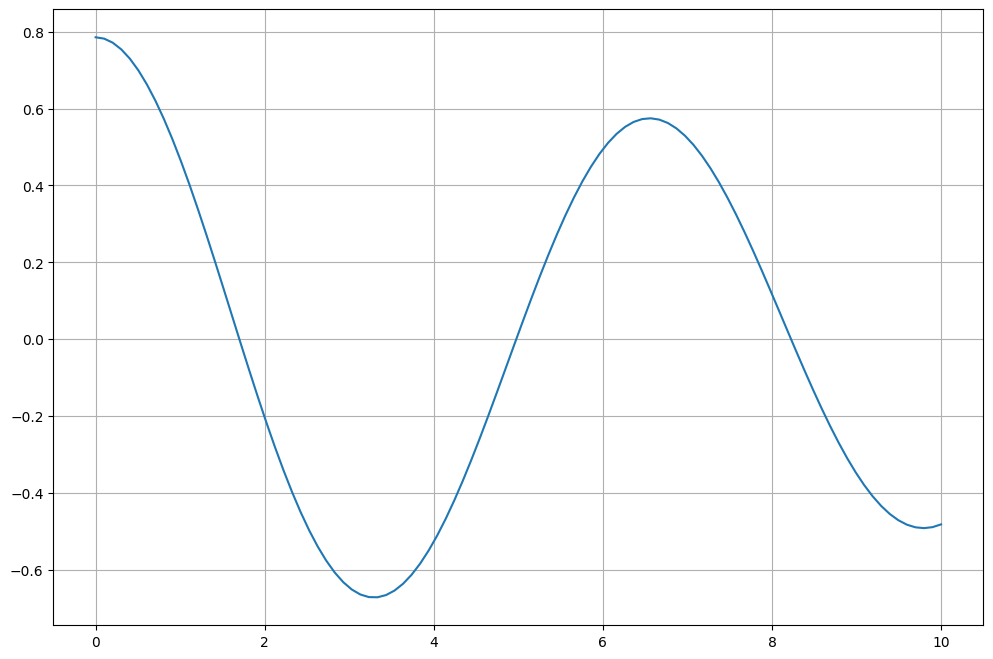

In [ ]:
@jax.jit(static_argnums=(2,3)) #argumentos n e maxit estaticos, todo controle de laço no jax deve ser estatico
def sol(theta, h, n, maxit):
    for i in range(1, n - 1):
        k = 2 * theta[i] - theta[i - 1]
        x = k
        for j in range(maxit):
            f = x + (h ** 2) * jnp.sin(x) - k
            df = 1 + (h ** 2) * jnp.cos(x)
            x = x - (f / df)
            #if jnp.abs(f) < tol: (jax.lax.while_loop deve resolver, mas nao entendi como usar)
             #   break
        theta = theta.at[i + 1].set(x)
    return theta



theta = sol(theta, h, n, maxit)

plt.figure(figsize=(12,8))
plt.plot(plot, theta)
plt.grid(True)
plt.show()
    

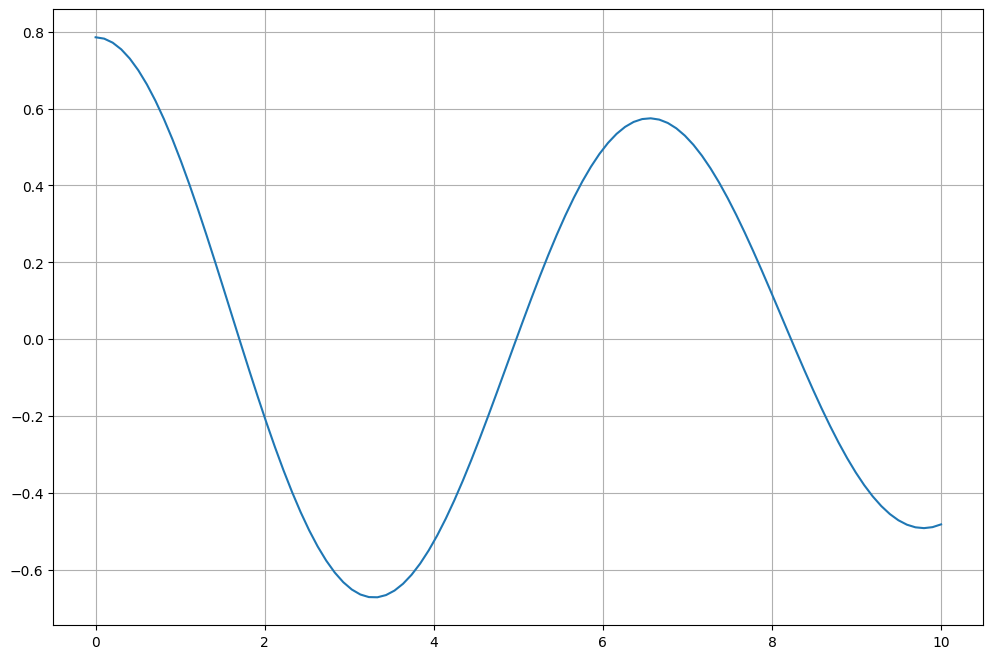

In [ ]:
@jax.jit
def sol(theta, h, n, maxit):
    
    #  for i in range(1, n - 1)
    def body_fun_time(estado_i): 
        i, theta = estado_i
        
       
        k = 2 * theta[i] - theta[i - 1]
        x = k 

        
        newton_inicial = (0, x, 1.0) # estado inicial do looping de newton: (iteracoes, chute, erro)

        #  for j in range(maxit) e if abs(f) < tol
        def cond_fun(estado_j):
            j, _ , erro = estado_j
            return jnp.logical_and(erro > tol, j < maxit) #operador && 

        def body_fun(estado_j): #corpo do segundo for, newton
            j, x, _ = estado_j 
            
           
            f = x + (h ** 2) * jnp.sin(x) - k
            df = 1 + (h ** 2) * jnp.cos(x)
            x = x - (f / df) # Atualiza o x

            # Recalcula f para verificar a tolerância na próxima volta (condição de parada)
            f_novo = x + (h ** 2) * jnp.sin(x) - k
            
            return (j + 1, x, jnp.abs(f_novo))

        newton_final = jax.lax.while_loop(cond_fun, body_fun, newton_inicial) #while que checa o criterio de parada
        
     
        x = newton_final[1] 
       

        
        theta = theta.at[i + 1].set(x)
        return (i + 1, theta)

    
    def cond_fun_time(estado_i):
        i, _ = estado_i
        return i < n - 1

    
    _, theta_final = jax.lax.while_loop(cond_fun_time, body_fun_time, (1, theta))
    return theta_final


solucao = sol(theta, h, n, maxit)

plt.figure(figsize=(12,8))
plt.plot(plot, solucao)
plt.grid(True)
plt.show()

In [57]:

print(jax.devices())
print(jax.default_backend())


[CudaDevice(id=0)]
gpu
